## Classification of flowers using the Iris dataset


* Classification means making a model to predict a **categorical** (discrete) outcome
    * Yes/no outcome
    * Multiple categories
    * Prediciting yes/no anxiety diagnoses
    
* Here, we predict whether a flower belongs to different species

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
import pandas as pd
import seaborn as sns

%matplotlib inline

/Users/paul/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
df = pd.DataFrame(iris.data)

In [4]:
df.rename(columns = {0:'sepal_length', 1:'sepal_width', 2:'petal_length', 3:'petal_width'}, inplace=True)

In [5]:
df['flower_type'] = iris.target

In [6]:
df = df[df.flower_type != 2]

<AxesSubplot:xlabel='flower_type', ylabel='sepal_length'>

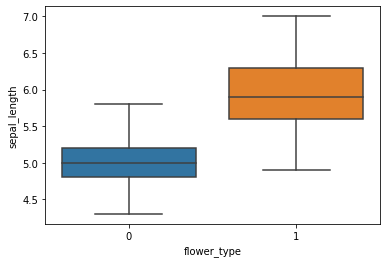

In [7]:
sns.boxplot(data = df, x = 'flower_type', y = 'sepal_length')

<AxesSubplot:xlabel='flower_type', ylabel='sepal_width'>

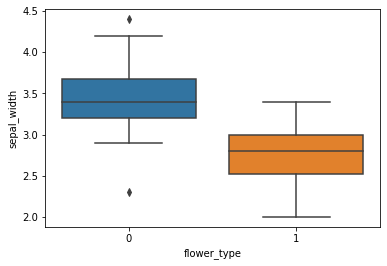

In [8]:
sns.boxplot(data = df, x = 'flower_type', y = 'sepal_width')

# Binary classification of flower

binary classificaiton is when we have only 2 outcomes possible (yes/no) (1/0)

* diagnosis or no diagnosis?
* is this a tumor or not?
* is there a face contained in this image, or not?
* is someone a democrat or republican?

# Split our data into training & test sets

In [9]:
from sklearn.model_selection import train_test_split


In [10]:
df

,sepal_length,sepal_width,petal_length,petal_width,flower_type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


## add some noise to give the model more trouble

In [11]:
import numpy as np
df['random1'] = np.random.normal(size = 100)
df['random2'] = np.random.normal(size = 100)
df['random3'] = np.random.normal(size = 100)

In [12]:
df

,sepal_length,sepal_width,petal_length,petal_width,flower_type,random1,random2,random3
0,5.1,3.5,1.4,0.2,0,-0.087047,0.754929,-1.399302
1,4.9,3.0,1.4,0.2,0,0.931131,-0.575713,0.155394
2,4.7,3.2,1.3,0.2,0,-0.129199,-0.284270,-0.149733
3,4.6,3.1,1.5,0.2,0,1.994206,1.596229,-1.059625
4,5.0,3.6,1.4,0.2,0,-0.952966,0.458870,0.851090
...,...,...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1,-0.851977,-0.314618,-1.781107
96,5.7,2.9,4.2,1.3,1,-1.623662,0.097479,0.634887
97,6.2,2.9,4.3,1.3,1,-0.343587,-0.402890,-0.265230
98,5.1,2.5,3.0,1.1,1,-0.537583,0.524283,-0.069282


In [47]:
# define X matrix (predictors) and y vector (outcome)
X = df[['random1', 'random2', 'random3', 'sepal_length', 'sepal_width']]
y = df.flower_type

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.5, random_state=49)

In [49]:
X_train.shape

(50, 5)

In [50]:
X_test.shape

(50, 5)

In [51]:
y_train.shape

(50,)

In [52]:
y_test.shape

(50,)

## train classifer on the training data, then test the performance on the test data


* model predictive performance will ALMOST ALWAYS be better on training data than test data
* BUT test data is a better metric of true model predictive performance

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
logreg = LogisticRegression()

In [55]:
# actually fit the model
logreg.fit(X_train, y_train)

/Users/paul/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
# generate predictions for the training set & test set
y_predicted_train = logreg.predict(X_train)
y_predicted_test = logreg.predict(X_test)

# Confusion matrix

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
confusion_matrix(y_train, y_predicted_train)

array([[27,  0],
       [ 1, 22]])

In [59]:
confusion_matrix(y_test, y_predicted_test)

array([[22,  1],
       [ 0, 27]])

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
accuracy_score(y_test, y_predicted_test)

0.98

In [62]:
accuracy_score(y_train, y_predicted_train)

0.98

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.96      1.00      0.98        27

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

